In [1]:
# Given FASTA sequence
fasta_sequence = "<KVFGRCELAAAMKRHGLDNYRGYSLGNWVCAAKFESNFNTQATNRNTDGSTDYGILQINSRWWCNDGRTPGSRNLCNIPCSALLSSDITASVNCAKKIVSDGNGMNAWVAWRNRCKGTDVQAWIRGCRL>"

# Dictionary to map one-letter amino acid codes to three-letter codes
one_to_three = {
    'A': 'ALA', 'R': 'ARG', 'N': 'ASN', 'D': 'ASP', 'C': 'CYS',
    'E': 'GLU', 'Q': 'GLN', 'G': 'GLY', 'H': 'HIS', 'I': 'ILE',
    'L': 'LEU', 'K': 'LYS', 'M': 'MET', 'F': 'PHE', 'P': 'PRO',
    'S': 'SER', 'T': 'THR', 'W': 'TRP', 'Y': 'TYR', 'V': 'VAL'
}

# Convert the sequence to three-letter amino acid codes
three_letter_sequence = [one_to_three[aa] for aa in fasta_sequence if aa in one_to_three]

print(three_letter_sequence)


['LYS', 'VAL', 'PHE', 'GLY', 'ARG', 'CYS', 'GLU', 'LEU', 'ALA', 'ALA', 'ALA', 'MET', 'LYS', 'ARG', 'HIS', 'GLY', 'LEU', 'ASP', 'ASN', 'TYR', 'ARG', 'GLY', 'TYR', 'SER', 'LEU', 'GLY', 'ASN', 'TRP', 'VAL', 'CYS', 'ALA', 'ALA', 'LYS', 'PHE', 'GLU', 'SER', 'ASN', 'PHE', 'ASN', 'THR', 'GLN', 'ALA', 'THR', 'ASN', 'ARG', 'ASN', 'THR', 'ASP', 'GLY', 'SER', 'THR', 'ASP', 'TYR', 'GLY', 'ILE', 'LEU', 'GLN', 'ILE', 'ASN', 'SER', 'ARG', 'TRP', 'TRP', 'CYS', 'ASN', 'ASP', 'GLY', 'ARG', 'THR', 'PRO', 'GLY', 'SER', 'ARG', 'ASN', 'LEU', 'CYS', 'ASN', 'ILE', 'PRO', 'CYS', 'SER', 'ALA', 'LEU', 'LEU', 'SER', 'SER', 'ASP', 'ILE', 'THR', 'ALA', 'SER', 'VAL', 'ASN', 'CYS', 'ALA', 'LYS', 'LYS', 'ILE', 'VAL', 'SER', 'ASP', 'GLY', 'ASN', 'GLY', 'MET', 'ASN', 'ALA', 'TRP', 'VAL', 'ALA', 'TRP', 'ARG', 'ASN', 'ARG', 'CYS', 'LYS', 'GLY', 'THR', 'ASP', 'VAL', 'GLN', 'ALA', 'TRP', 'ILE', 'ARG', 'GLY', 'CYS', 'ARG', 'LEU']


In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('classic')
#mpl.use('pdf')
mpl.rcParams['xtick.major.size'] = 8
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 8
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['axes.linewidth']= 2
col_names=['Number','AA-Name','Structure']

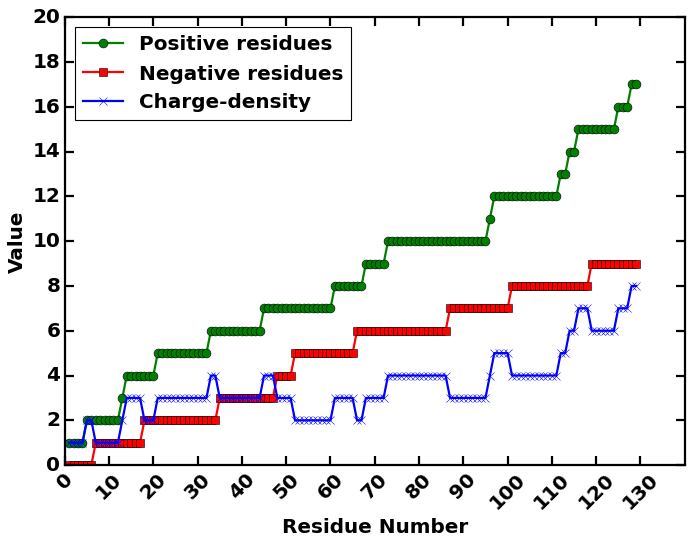

In [3]:

filename="XXXX"
#***************************************

plotfile=filename+"guessingIDP.png"

amino_acids=three_letter_sequence
total_aa=len(three_letter_sequence)
#Counting number of residues with different polarity
namex=['LYS','ARG','HIS','GLU','ASP']
namep=['LYS','ARG']
namen=['GLU','ASP']
namenonpolar=['GLY','ALA','VAL','CYS','ILE','LEU','MET','PHE','TYR','TRP','PRO']
namepolar=['SER','THR','ASN','GLN']
####creating lists, will be used to map data
count=0
charge_list1=[] #contains +1 for namep, -1 for namen and 0 for others
charge_list2=[] #contains +1 for namep, +1 for namen and 0 for others
positive_res=[]
negative_res=[]
charged_res=[]
polar_res=[]
while count <= total_aa-1:
    if amino_acids[count] in namep:
        charge_list1.append(1)
        charge_list2.append(1)
        positive_res.append(1)
        negative_res.append(0)
        charged_res.append(1)
        polar_res.append(1)
    elif amino_acids[count] in namen:
        charge_list1.append(-1)
        charge_list2.append(1)
        positive_res.append(0)
        negative_res.append(1)
        charged_res.append(1)
        polar_res.append(1)
    elif amino_acids[count] in namepolar:
        polar_res.append(1)
        charge_list1.append(0)
        charge_list2.append(0)
        positive_res.append(0)
        negative_res.append(0)
        charged_res.append(0)
    else:
        charge_list1.append(0)
        charge_list2.append(0)
        positive_res.append(0)
        negative_res.append(0)
        charged_res.append(0)
        polar_res.append(0)
    count+=1

#print(charge_list1, charge_list2)
#print(len(data)len(charge_list1)) ##To check numbers
##creating map below
count=0
i=1
map1=0
map2=0
map1_list=[]
map2_list=[]
number=[]
while count <= total_aa-1:
    map1=map1+charge_list1[count]
    map2=map2+charge_list2[count]
    map1_list.append(map1/i)
    map2_list.append(map2/i)
    number.append(i)
    i+=1
    count+=1
'''plt.figure(figsize=(20,15),facecolor='white')

legends=['Positive-Res','negative-Res','Charged-Res']
plt.subplot(2, 2, 1)
plt.scatter(number,positive_res, marker = 'o', color='green')
plt.legend(["Positive"])
plt.subplot(2, 2, 2)
plt.scatter(number,negative_res, marker = 's', color='red')
plt.legend(["Negative"])
plt.subplot(2, 2, 3)
plt.scatter(number,charged_res, marker = 'v', color='blue')
plt.legend(["Charged"])
#plt.legend(["Polar"])
#plt.plot(number,map1_list)
#plt.plot(number,map2_list)
#legends=['+1,-1,0','+1,+1,0']
#plt.legend(legends)
plt.suptitle(plotfile, fontsize=30)

plt.savefig(plotfile, dpi=300, bbox_inches='tight')'''
#plt.show()
#####This is for plotting the chage along residue
positive_charge=0
negative_charge=0
net_charge=0
total_charge=0
positive_chargeadd=[]
negative_chargeadd=[]
net_chargeadd=[]
total_chargeadd=[]
count=0
while count <= total_aa-1:
    positive_charge=positive_charge+positive_res[count]
    positive_chargeadd.append(positive_charge)
    negative_charge=negative_charge+negative_res[count]
    negative_chargeadd.append(negative_charge)
    total_charge=total_charge+charged_res[count]
    total_chargeadd.append(total_charge)
    net_charge=net_charge+charge_list1[count]
    net_chargeadd.append(net_charge)
    count+=1
#print(charge_list1)
#print(positive_chargeadd)
#print(negative_chargeadd)
#print(total_chargeadd)
#print(net_chargeadd)
plt.figure(figsize=(10,7),facecolor='white')
plt.plot(number,positive_chargeadd, marker='o', markersize=8, color='green', linestyle='-', linewidth=2)
plt.plot(number,negative_chargeadd, marker='s', markersize=8, color='red', linestyle='-', linewidth=2)
plt.plot(number,net_chargeadd, marker='x', markersize=8, color='blue', linestyle='-', linewidth=2)
#plt.legend()
plt.legend(["Positive residues","Negative residues","Charge-density"],numpoints = 1,prop=dict(weight='bold',size=18),loc='best')
plt.xticks(np.arange(0,140,10),rotation=45,fontsize=18,weight='bold')
plt.yticks(np.arange(0,22,2),fontsize=18,weight='bold')
plt.xlabel("Residue Number",weight='bold',fontsize=18)
plt.ylabel("Value",weight='bold',fontsize=18)
#plt.suptitle("", fontsize=30)
plt.savefig(filename+"charge.png", dpi=300, bbox_inches='tight')

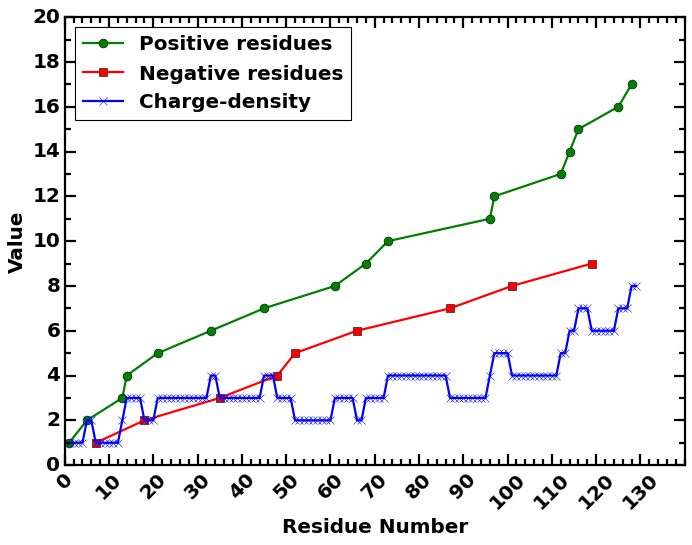

In [4]:
amino_acids=three_letter_sequence
total_aa=len(three_letter_sequence)
#Counting number of residues with different polarity
namex=['LYS','ARG','HIS','GLU','ASP']
namep=['LYS','ARG']
namen=['GLU','ASP']
namenonpolar=['GLY','ALA','VAL','CYS','ILE','LEU','MET','PHE','TYR','TRP','PRO','HIS']
namepolar=['SER','THR','ASN','GLN']
####creating lists, will be used to map data
count=0
charge_list1=[] #contains +1 for namep, -1 for namen and 0 for others
charge_list2=[] #contains +1 for namep, +1 for namen and 0 for others
positive_res=[]
positive_res_resid=[]
negative_res=[]
negative_res_resid=[]
charged_res=[]
polar_res=[]
positive_count=0
positive_sum=[]
negative_count=0
negative_sum=[]
while count <= total_aa-1:
    if amino_acids[count] in namep:
        positive_count+=1
        positive_sum.append(positive_count)
        charge_list1.append(1)
        charge_list2.append(1)
        positive_res.append(1)
        positive_res_resid.append(count)
        negative_res.append(0)
        charged_res.append(1)
        polar_res.append(1)
    elif amino_acids[count] in namen:
        
        negative_count+=1
        negative_sum.append(negative_count)
        charge_list1.append(-1)
        charge_list2.append(1)
        positive_res.append(0)
        negative_res.append(1)
        negative_res_resid.append(count)
        charged_res.append(1)
        polar_res.append(1)
    elif amino_acids[count] in namepolar:
        polar_res.append(1)
        charge_list1.append(0)
        charge_list2.append(0)
        positive_res.append(0)
        negative_res.append(0)
        charged_res.append(0)
    else:
        charge_list1.append(0)
        charge_list2.append(0)
        positive_res.append(0)
        negative_res.append(0)
        charged_res.append(0)
        polar_res.append(0)
    count+=1
plt.figure(figsize=(10,7),facecolor='white')
positive_res_resid = [x + 1 for x in positive_res_resid]
plt.plot(positive_res_resid,positive_sum, marker='o', markersize=8, color='green', linestyle='-', linewidth=2)
negative_res_resid = [x + 1 for x in negative_res_resid]
plt.plot(negative_res_resid,negative_sum, marker='s', markersize=8, color='red', linestyle='-', linewidth=2)
number=np.arange(1,total_aa+1,1)
plt.plot(number,net_chargeadd, marker='x', markersize=8, color='blue', linestyle='-', linewidth=2)
#plt.legend()
plt.legend(["Positive residues","Negative residues","Charge-density"],numpoints = 1,prop=dict(weight='bold',size=18),loc='best')
plt.xticks(np.arange(0,140,10),rotation=45,fontsize=18,weight='bold')
plt.yticks(np.arange(0,22,2),fontsize=18,weight='bold')
plt.xlabel("Residue Number",weight='bold',fontsize=18)
plt.ylabel("Value",weight='bold',fontsize=18)
# Set the minor ticks
ax = plt.gca()
x_minor_locator = plt.MultipleLocator(2)
y_minor_locator = plt.MultipleLocator(1)
ax.xaxis.set_minor_locator(x_minor_locator)
ax.yaxis.set_minor_locator(y_minor_locator)
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', length=5, color='black')
#plt.suptitle("", fontsize=30)
plt.savefig(filename+"charge.png", dpi=300, bbox_inches='tight')

In [6]:
17-9

8